<a href="https://colab.research.google.com/github/JJJJeon/ESAA/blob/main/10%EC%A3%BC%EC%B0%A82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류
* 지도학습(레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식)의 대표적인 유형
* 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측
* 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

앙상블
* 배깅(Bagging)-랜덤 포레스트(Random Forest)
* 부스팅(Boosting)-그래디언트 부스팅(Gradient Boosting), XgBoost, LightGBM 등

### 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
* 규칙 노드: 규칙 조건이 되는 것
* 리프 노드: 결정된 클래스 값
* 서브 트리: 새로운 규칙 조건마다 생성
* 결정 노드: 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 만듦

깊이가 깊어질수록 결정 트리의 예측 성능 저하될 가능성 높음 (과적합)

특징
* 알고리즘이 쉽고 직관적
* 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업 필요 없음
* 과적합으로 정확도가 떨어짐


파라미터: min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

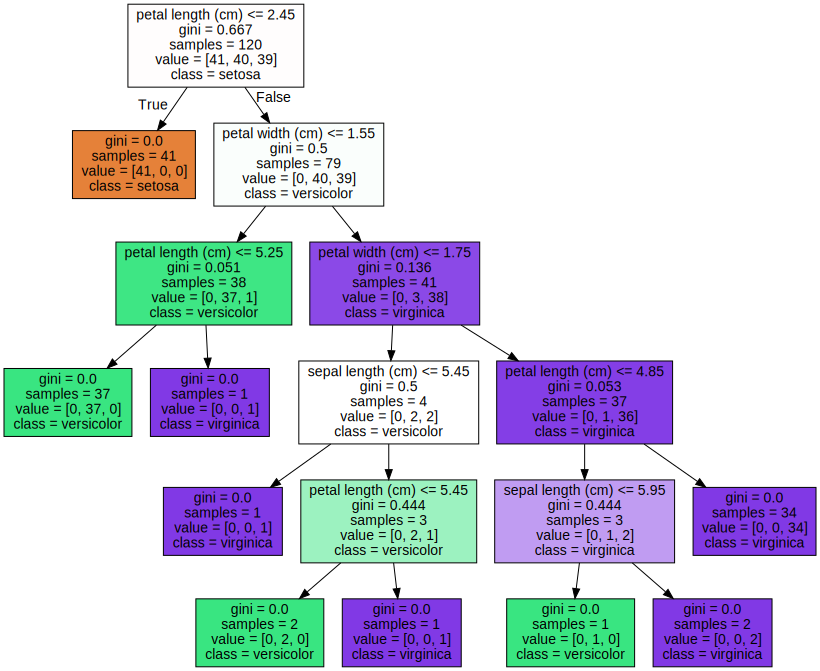

In [4]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot')as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

리프노드: 최종 클래스 값이 결정되는 노드. 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족한 노드

브랜치 노드: 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 규칙 조건을 가짐

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025005
sepal width (cm):0.000000
petal length (cm):0.554903
petal width (cm):0.420092


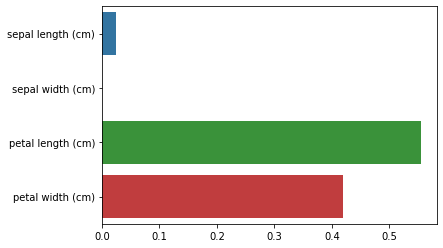

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data. feature_names, dt_clf.feature_importances_):
  print('{0}:{1:3f}'.format(name, value))

#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)
# petal_length가 가장 피처 중요도가 높음

make_classification(): 분류를 위한 테스트용 데이터를 쉽게 만들 수 있음

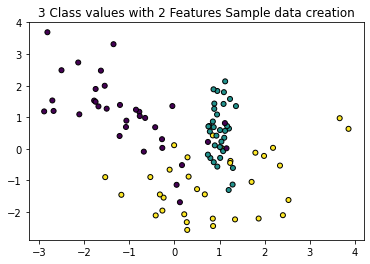

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features,y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, edgecolor='k')

### 앙상블 학습
여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값 얻는 것
* 보팅 (Voting): 일반적으로 서로 다른 알고리즘을 가진 분류기 결합
* 배깅 (Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습 수행 (랜덤 포레스트)
* 부스팅 (Boosting): 여러개의 분류기가 순차적으로 학습을 수행하되, 다음 분류기에게는 가중치를 부여하면서 학습과 예측 진행 (그래디언트 부스트, XGBoost, LightGBM

* 하드 보팅: 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
* 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정 (일반적)

In [9]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [11]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도:{1:4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도:0.947368
LogisticRegression 정확도:0.938596
KNeighborsClassifier 정확도:0.938596


### 랜덤 포레스트
비교적 빠른 수행 속도, 높은 예측 성능

부트스트래핑(bootstrapping): 여러 개의 데이터 세트를 중첩되게 분리하는 것

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test=get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:4f}'.format(accuracy))

FileNotFoundError: ignored

In [ ]:
하이퍼 파라미터: n_estimators, max_features, max_depth, min_samples_leaf

In [14]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params. cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

SyntaxError: ignored

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf.clf1.predict(X_test)
print('예측 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, imdex=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### GBM(Gradient Boosting Machine
부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

에이다 부스트와 달리 가중치 업데이트를 경사 하강법을 이용

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:1f}초'.format(time.time()-start_time))

하이퍼 파라미터: n_estimators, max_depth, max_features, loss, learning_rate, subsample

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv=GridSearchCV(gb_clf, params_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이요해 최적으로 학습된 estimator로 예측 수행
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)
print('GBM 정확도:{0:4f}'.format(gb_accuracy))